### 수학통계적 방법으로 선형회귀(linear regression) 풀기

##### Linear Regression  (월수익과 카드사용액의 관계)
#### X(월수익), Y(카드사용액) 관계를 일차함수로 표현(모델링)하기. 
* 일차함수의 기울기는  (X,Y의 공분산) / (X의 분산)으로 구할 수 있다.

In [3]:
import math
import matplotlib.pyplot as plt

income = [100,200,300,400,500] # 월수익
card = [30, 57, 76, 140, 197] # 카드사용금액

In [4]:
for x, y in zip(income, card):
  print(x, y)

100 30
200 57
300 76
400 140
500 197


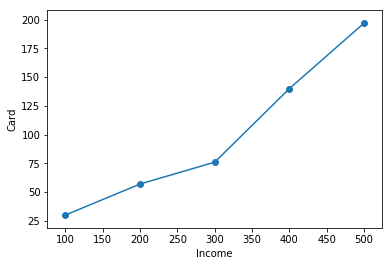

In [5]:
plt.figure()
plt.plot(income, card)
plt.scatter(income, card)

plt.xlabel('Income')
plt.ylabel('Card')
plt.show()

### 평균 (mean) 구하기

In [6]:
mean_income = sum(income) / len(income)
mean_card = sum(card) / len(card)
print('MEAN', mean_income, mean_card)


MEAN 300.0 100.0


In [7]:
import numpy as np
np.mean(income)

300.0

In [8]:
np.mean(card)

100.0

### 분산값 구하기

In [9]:
vars = [(x-mean_income)*(x - mean_income) for x in income]
variance_income = sum(vars) / (len(vars)-1)
print('VAR', variance_income)

VAR 25000.0


In [10]:
np.var(income)

20000.0

In [11]:
np.var(card)

3666.8

### 공분산(covariance)구하기

In [12]:
covars = [ (x-mean_income) * (y - mean_card) for x, y in zip(income, card)]
covariance = sum(covars) /  (len(covars)-1)
print('COV', covariance)

COV 10425.0


In [13]:
np.cov(income, card)

array([[25000. , 10425. ],
       [10425. ,  4583.5]])

### 통계적 방법으로 기울기(W), y절편(B)구하기

In [14]:
# W = (X,Y의 covariance) / (X의 분산)
W = float(covariance / variance_income)
print('W', W)


W 0.417


In [15]:
# y = B + W * X
# B = Y - W * X
B = mean_card - W * mean_income
print('B = ', B)

B =  -25.099999999999994


### 통계적 방법으로 도출한 모델로 카드사용량 예측하기

In [16]:
card_from_model = [B + W * x for x in income] 
print('원데이터 출력값 : ', card)
print('모델의 출력값 :   ', card_from_model)
type(card_from_model)

원데이터 출력값 :  [30, 57, 76, 140, 197]
모델의 출력값 :    [16.6, 58.3, 100.0, 141.7, 183.4]


list

In [17]:
for y1, y2 in zip(card, card_from_model):
    print(y1, y2)

30 16.6
57 58.3
76 100.0
140 141.7
197 183.4


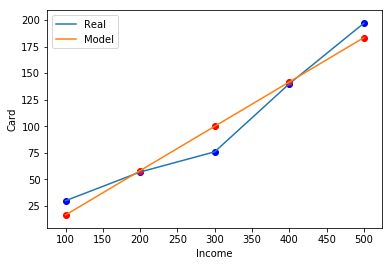

In [18]:
plt.figure()
plt.plot(income, card, label='Real')
plt.plot(income, card_from_model, label='Model')
plt.scatter(income, card, c='blue')
plt.scatter(income, card_from_model, c='red')
plt.xlabel('Income')
plt.ylabel('Card')
plt.legend()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))     # 편차 제곱의 평균의 

def linear_reg(X, Y, name=''):  
  X = X.reshape(-1, 1)
  model = LinearRegression()
  model.fit(X, Y)
  # model.coef_ -- 기울기
  # model.intercept_ -- Y절편(bias)
  print('Model Parameters:', model.coef_, model.intercept_)
  Y2 = model.predict(X)
  rmse_v = rmse(Y, Y2)
  print("Mean squared error: %.2f" % mean_squared_error(Y, Y2))
  print("RMSE of %s: %.2f" % (name, rmse_v))
  print('R^2 (coefficient of determination): %.2f' % r2_score(Y, Y2))

In [25]:
a = np.array(income)
print(a)
print()

a2= a.reshape(-1,1)
print(a2)
print()

a3 = a.reshape(-1,5)
print(a3)
print()

a4 = a3.flatten()
print(a4)



[100 200 300 400 500]

[[100]
 [200]
 [300]
 [400]
 [500]]

[[100 200 300 400 500]]

[100 200 300 400 500]


In [26]:
linear_reg(np.array(income), np.array(card), 'my_model')

Model Parameters: [0.417] -25.100000000000065
Mean squared error: 189.02
RMSE of my_model: 13.75
R^2 (coefficient of determination): 0.95


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


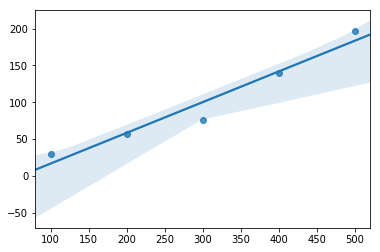

In [27]:
import seaborn as sns
sns.regplot(np.array(income), np.array(card))